Mean: 3419.8319037393994  Sigma: 14.750179389260294


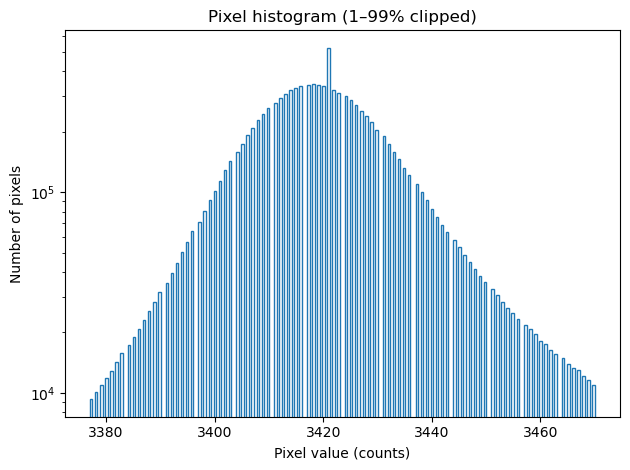

In [7]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fname = "mosaic.fits"
with fits.open(fname) as hdul:
    data = hdul[0].data.astype(float)

flat = data.flatten()

# Focus on central part of the distribution
clip_min, clip_max = np.percentile(flat, [1, 95])
mask = (flat >= clip_min) & (flat <= clip_max)
clipped = flat[mask]

mean = np.mean(clipped)
sigma = np.std(clipped)
print("Mean:", mean, " Sigma:", sigma)

plt.figure()
plt.hist(clipped, bins=200, histtype="step")
plt.xlabel("Pixel value (counts)")
plt.ylabel("Number of pixels")
plt.title("Pixel histogram (1–99% clipped)")
plt.yscale("log")
plt.tight_layout()
plt.show()


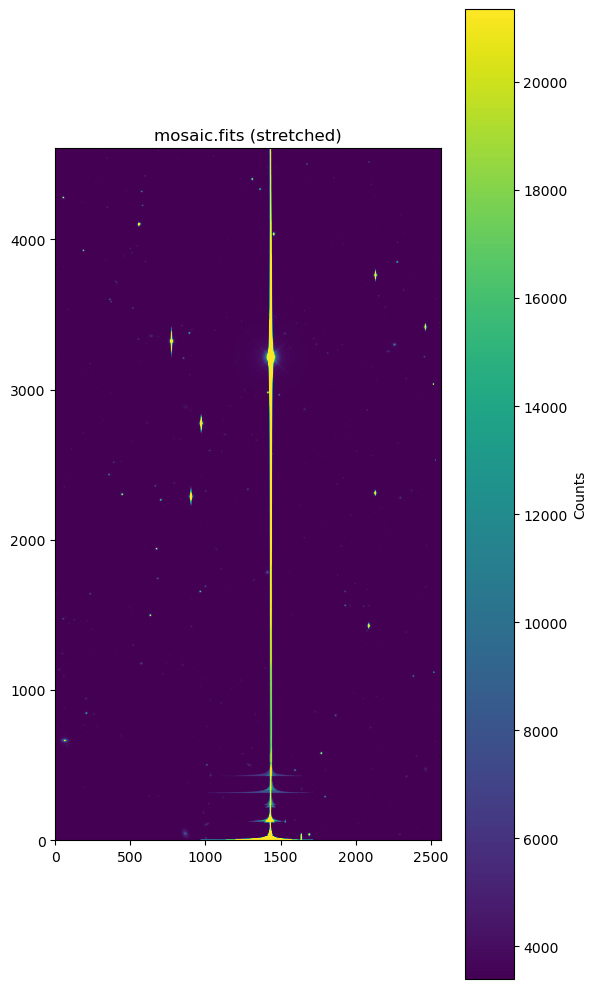

In [2]:
vmin, vmax = np.percentile(data, [5, 99.5])

plt.figure(figsize=(6, 10))
plt.imshow(data, origin="lower", vmin=vmin, vmax=vmax)
plt.colorbar(label="Counts")
plt.title("mosaic.fits (stretched)")
plt.tight_layout()
plt.show()
